# Online Retail - Data Analysis

This project is a part of my 'Data Analysis with Python: Zero to Pandas' course. 
In this project, I have analysed an Online Retail dataset that I got from Kaggle.com and contains over 500k rows of 15+ countries' data. I have used some of the most popular data analysis libraries of python such as numpy, pandas, matplotlin and seaborn. I have drawn some very interesting graphs and charts. 
Hope you find it interesting too!

## Downloading the Dataset

Firstly, we need to download the dataset. For that, we will require a kaggle account's username and apikey that you can get from your profile section of kaggle.com website after logging in there.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [145]:
dataset_url = 'https://www.kaggle.com/parshanrock/online-retail' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

Abort: 

The dataset has been downloaded and extracted.

In [4]:
data_dir = './online-retail'

In [5]:
import os
os.listdir(data_dir)

['OnlineRetail.csv.csv']

## Data Preparation and Cleaning

So, by the executing the code of the above cells we have downloaded the dataset. Now, its time to read the dataset using the pandas library.
For that, we need to import the pandas library that we will import as pd. I have also imported the calender library as that will help us in converting month number and weekday number to it's name such as from 12 -- December and from 6 -- Sunday



In [299]:
import numpy as np
import pandas as pd
import calendar

In [338]:
data_raw_df = pd.read_csv('online-retail/OnlineRetail.csv.csv')

#### Now that the dataset has been loaded, it's time for us to delete all those rows from the dataset that contains a null value. It will help us in analysing the dataset in a efficient and effective way.

In [339]:
data_raw_df=data_raw_df.dropna()

In [340]:
data_raw_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-11 12:50,4.15,12680.0,France


#### This is how the dataset looks like after removing all the NAN rows.

## Exploratory Analysis and Visualization

In this section of the project, We will draw some graphs and charts that will help us visualize some of the most interesting facts about this dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [301]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Exploring how much each country sold

In [350]:
data_raw_df['Sales'] = data_raw_df['Quantity']*data_raw_df['UnitPrice']
data_raw_df['Sales']=data_raw_df['Sales'].astype('int64')

In [351]:
top_sales_country = pd.DataFrame(data={'Country':data_raw_df['Country'],'Sales':data_raw_df['Sales']})
top_sales_country = top_sales_country.groupby('Country').sum().reset_index()

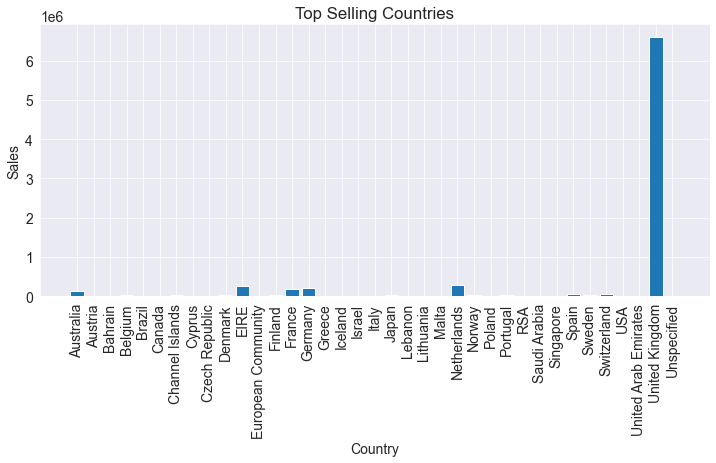

In [352]:
plt.figure(figsize=(12,5))
plt.bar(top_sales_country['Country'],top_sales_country['Sales'])
plt.title('Top Selling Countries')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical');

### Exploring most sold products

In [353]:
top_products = data_raw_df.groupby('StockCode').sum().reset_index().sort_values(by='Quantity',ascending=False).head(20)

In [354]:
all_prices = data_raw_df.groupby('StockCode').mean()

In [355]:
top_products = pd.DataFrame({'StockCode':top_products.StockCode,'Quantity':top_products['Quantity'],'UnitPrice':[all_prices.loc[row[0]].UnitPrice for row in top_products.values]})

<ipython-input-356-60dcee37dba2>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_products['StockCode'], rotation = 90);


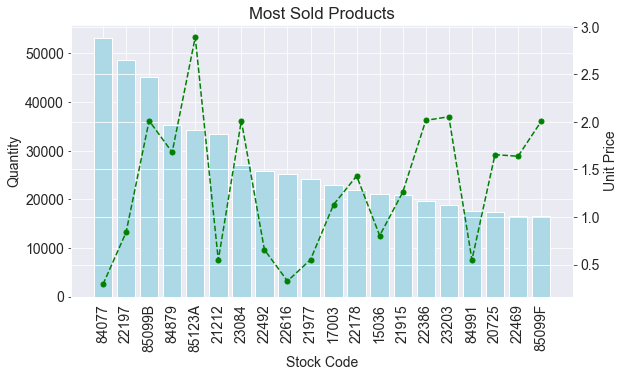

In [356]:
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(top_products['StockCode'],top_products['Quantity'],color='lightblue')
ax2.plot(top_products['StockCode'],top_products['UnitPrice'],'g--o',markersize=5)
plt.title('Most Sold Products')
ax1.set_xlabel('Stock Code')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Unit Price')
ax1.set_xticklabels(top_products['StockCode'], rotation = 90);

### Monthly sales analysis 

In [357]:
data_raw_df['InvoiceDate'] = pd.to_datetime(data_raw_df['InvoiceDate'])
data_raw_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16


In [358]:
data_raw_df['Month'] = pd.DatetimeIndex(data_raw_df['InvoiceDate']).month
data_raw_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16


In [359]:
monthly_data_df = data_raw_df.groupby('Month').sum().reset_index()
monthly_data_df

,Month,Quantity,UnitPrice,CustomerID,Sales
0,1,269379,73202.320,3.319198e+08,465048
1,2,262833,67529.430,3.117809e+08,426943
2,3,344012,96183.240,4.223298e+08,566883
3,4,278585,91117.721,3.541194e+08,415070
4,5,367852,125537.660,4.400088e+08,634555
5,6,356922,129301.450,4.264710e+08,594784
6,7,363418,92754.521,4.209226e+08,561250
7,8,386612,88126.750,4.219478e+08,603548
8,9,537496,126029.422,6.229373e+08,912720
9,10,569666,186583.000,7.727017e+08,951020


In [360]:
monthly_data_df['Month'] =monthly_data_df['Month'].transform(lambda x: calendar.month_name[x])
monthly_data_df['Month']

0       January
1      February
2         March
3         April
4           May
5          June
6          July
7        August
8     September
9       October
10     November
11     December
Name: Month, dtype: object

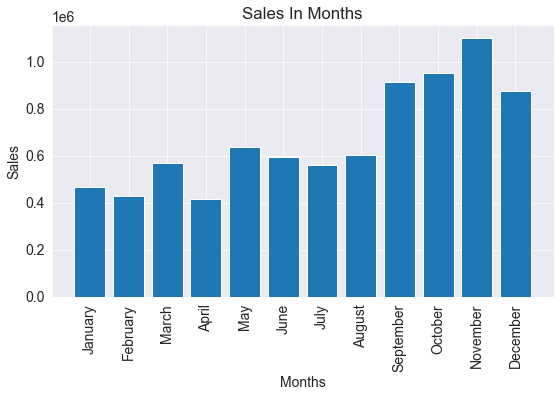

In [361]:
plt.bar(monthly_data_df['Month'],monthly_data_df['Sales'])
plt.xticks(range(0,12),rotation='vertical')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales In Months')
plt.show()

### Monthly - Daily Sales Analysis

In [362]:
day_data_df = data_raw_df.copy()
day_data_df['Day'] = pd.DatetimeIndex(day_data_df['InvoiceDate']).day
day_data_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16,9


In [363]:
day_data_df=day_data_df.groupby(['Month','Day']).sum().sort_values(['Month','Day']).reset_index()
day_data_df.drop(labels=['Quantity','UnitPrice','CustomerID'],axis=1,inplace=True)

In [365]:
day_data_arr = np.zeros((12,31))
for i in day_data_df.values:
    day_data_arr[i[0]-1][i[1]-1] = i[2]

In [367]:
ylabels = [calendar.month_name[i] for i in range(1,13)]

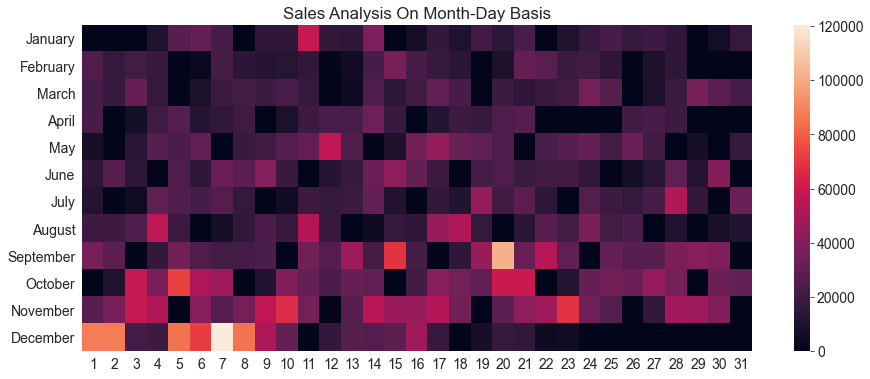

In [369]:
fig,ax = plt.subplots(figsize=(15,6))
plt.title('Sales Analysis On Month-Day Basis')
ax.set_xlabel('Days')
colormap = sns.color_palette("Greens")
sns.heatmap(day_data_arr,xticklabels=range(1,32),yticklabels=[calendar.month_name[i] for i in range(1,13)],label='Month',ax=ax);

### Hourly Sales Analysis

In [372]:
hour_data_df = data_raw_df.copy()
hour_data_df['Hour'] = pd.DatetimeIndex(hour_data_df['InvoiceDate']).hour

In [373]:
hour_data_df = hour_data_df.groupby('Hour').sum().reset_index().sort_values('Hour')

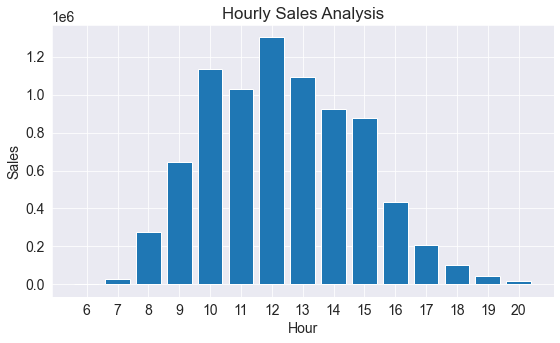

In [374]:
plt.bar(hour_data_df['Hour'],hour_data_df['Sales'])
plt.xticks(range(6,21))
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.title('Hourly Sales Analysis');

### Weekday Sales Analysis

In [375]:
weekday_data_df = data_raw_df.copy()
weekday_data_df['Weekday'] = pd.DatetimeIndex(weekday_data_df['InvoiceDate']).weekday

In [376]:
weekday_data_df = weekday_data_df.groupby('Weekday').sum().reset_index()

In [377]:
weekday_data_df['Weekday'] = weekday_data_df['Weekday'].transform(lambda x: calendar.day_name[x])

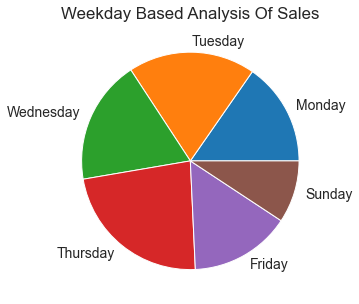

In [378]:
plt.pie(weekday_data_df['Sales'],labels=weekday_data_df['Weekday'])
plt.title('Weekday Based Analysis Of Sales');

Let us save and upload our work to Jovian before continuing

In [379]:
import jovian

In [380]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharg895/online-retail-data-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tusharg895/online-retail-data-analysis


'https://jovian.ai/tusharg895/online-retail-data-analysis'

## Asking and Answering Questions

Here, we will answer some of very interesting and important questions about this dataset by the help of the analysis that we have done till now.



### Q1: The top 5 countries in terms of sales

In [328]:
top_sales_country = top_sales_country.sort_values(by='Sales',ascending=False).reset_index(drop=True)

In [381]:
top_sales_country['Country'].head()

0    Australia
1      Austria
2      Bahrain
3      Belgium
4       Brazil
Name: Country, dtype: object

### Q2: Top 10 most sold products

In [382]:
top_products = top_products.reset_index(drop=True)

In [384]:
top_products['StockCode'].head(10)

0     84077
1     22197
2    85099B
3     84879
4    85123A
5     21212
6     23084
7     22492
8     22616
9     21977
Name: StockCode, dtype: object

### Q3: Top 10 pairs of products that are usually bought together

In [385]:
duplicated_df = uk_df[uk_df.duplicated(keep=False)].copy()
duplicated_df['Merged'] = duplicated_df.groupby('InvoiceNo')['StockCode'].transform(lambda x: ','.join(x))

In [386]:
duplicated_df = duplicated_df[['InvoiceNo','Merged']].drop_duplicates()

In [387]:
from itertools import combinations
from collections import Counter

In [388]:
counter = Counter()
for stock_codes in duplicated_df['Merged']:
    stock_codes_list = stock_codes.split(',')
    counter.update(Counter(combinations(stock_codes_list,2)))
counter.most_common(10)

[(('22697', '22698'), 214),
 (('22698', '22698'), 196),
 (('22697', '22697'), 74),
 (('21034', '21034'), 71),
 (('22698', '23170'), 40),
 (('22698', '22776'), 40),
 (('20727', '20727'), 36),
 (('21755', '21754'), 36),
 (('21755', '21755'), 34),
 (('22775', '22775'), 33)]

### Q4: Top 3 months in terms of sales

In [389]:
monthly_data_df = monthly_data_df.sort_values(by='Sales').reset_index(drop=True)
monthly_data_df['Month'].head(3)

0       April
1    February
2     January
Name: Month, dtype: object

### Q5: Best hours for sales or best time for advertising

In [390]:
hour_data_df=hour_data_df.sort_values(by='Sales',ascending=False).reset_index(drop=True)

In [391]:
hour_data_df.head()

,Hour,Quantity,UnitPrice,CustomerID,Month,Sales
0,12,815693,236310.210,1.125370e+09,563655,1301716
1,10,686906,129775.981,5.909521e+08,284729,1133573
2,13,665148,217284.420,9.967588e+08,499202,1091306
3,11,629094,167112.380,7.708067e+08,372520,1030865
4,14,537569,195019.381,8.452458e+08,425415,922175


### Q6. Best Weekdays in terms of sales

In [392]:
weekday_data_df = weekday_data_df.sort_values(by='Sales',ascending=False).reset_index(drop=True)
weekday_data_df['Weekday'].head()

0     Thursday
1      Tuesday
2    Wednesday
3       Monday
4       Friday
Name: Weekday, dtype: object

Let us save and upload our work to Jovian before continuing.

In [393]:
import jovian

In [394]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharg895/online-retail-data-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tusharg895/online-retail-data-analysis


'https://jovian.ai/tusharg895/online-retail-data-analysis'

## Inferences and Conclusion

So, this concludes our analysis. We saw that which country recorded the most sales, which products are the most popular, which month is the best in terms of sales, which pairs of products are usually bought together, which month is the best for advertising, which weekday is the best for advertising, which day is the best for advertising and which hour is the best for advertising.
I hope you liked it.

In [395]:
import jovian

In [396]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharg895/online-retail-data-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tusharg895/online-retail-data-analysis


'https://jovian.ai/tusharg895/online-retail-data-analysis'

## References 

Other than the official documentation of pandas, matplotlib and seaborn, here are some of the useful resources that I found for this project:
https://youtu.be/YbkC8avAL60
https://youtu.be/eMOA1pPVUc4

In [397]:
import jovian

In [398]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tusharg895/online-retail-data-analysis" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/tusharg895/online-retail-data-analysis


'https://jovian.ai/tusharg895/online-retail-data-analysis'

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
